In [1]:
%matplotlib nbagg

In [2]:
import sys
import os
sys.path.insert(1, os.path.abspath("../build/lib.linux-x86_64-3.9/"))
import pyopencl, numpy
from pyopencl import array
import fabio
import pyFAI
from pyFAI.test.utilstest import UtilsTest
#os.environ["PYOPENCL_CTX"] = "0:1"
os.environ["PYOPENCL_COMPILER_OUTPUT"]="1"
from pyFAI.gui import jupyter
from matplotlib.pyplot import subplots
pyFAI

<module 'pyFAI' from '/home/jerome/workspace-ssd/pyFAI/build/lib.linux-x86_64-3.9/pyFAI/__init__.py'>

In [3]:
img = fabio.open(UtilsTest.getimage("Pilatus6M.cbf")).data
ai = pyFAI.load(UtilsTest.getimage("Pilatus6M.poni"))
npt = 1000
method = ["no", "csr", None]
unit="r_mm"
ai

Detector Detector	 Spline= None	 PixelSize= 1.720e-04, 1.720e-04 m
SampleDetDist= 3.000000e-01m	PONI= 2.254060e-01, 2.285880e-01m	rot1=0.000000  rot2= 0.000000  rot3= 0.000000 rad
DirectBeamDist= 300.000mm	Center: x=1329.000, y=1310.500 pix	Tilt=0.000 deg  tiltPlanRotation= 0.000 deg

<IPython.core.display.Javascript object>


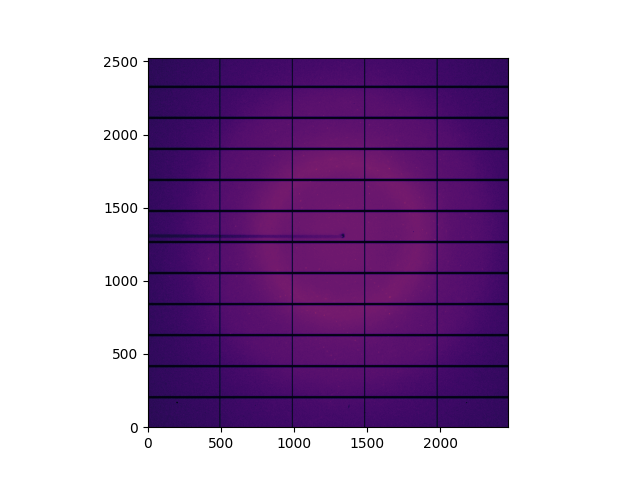

In [4]:
_=jupyter.display(img)

<IPython.core.display.Javascript object>


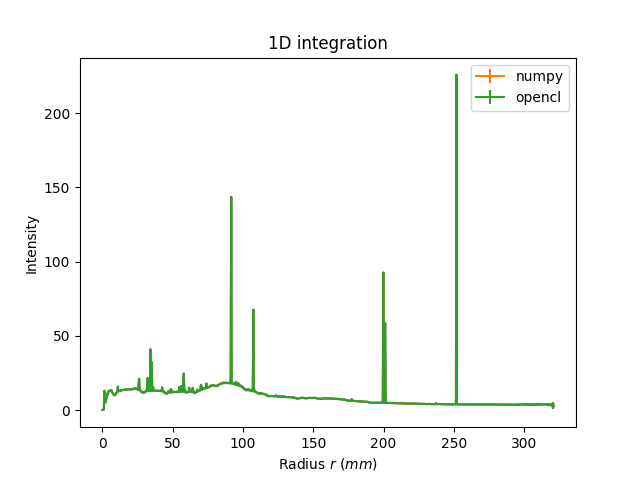

In [5]:
method[-1] = "cython"
res_c = ai.integrate1d(img, npt, unit=unit, method=method, error_model="poisson")
method[-1] = "python"
res_n = ai.integrate1d(img, npt, unit=unit, method=method, error_model="poisson")
method[-1] = "opencl"
res_o = ai.integrate1d(img, npt, unit=unit, method=method, error_model="poisson")
ax = jupyter.plot1d(res_c)
ax.errorbar(*res_n, label="numpy")
ax.errorbar(*res_o, label="opencl")
_=ax.legend()


CPU times: user 1.03 s, sys: 351 ms, total: 1.38 s
Wall time: 98.5 ms
CPU times: user 114 ms, sys: 0 ns, total: 114 ms
Wall time: 114 ms


<IPython.core.display.Javascript object>


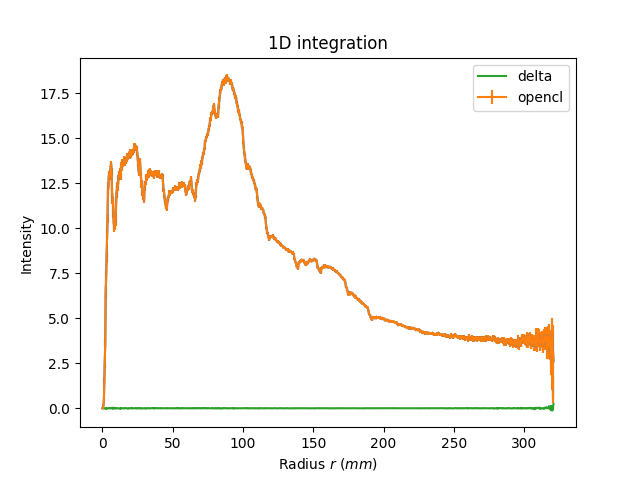

In [10]:
cutof = 0
max_iter= 5
method[-1] = "cython"
res_i = ai.integrate1d(img, npt, unit=unit, method=method, error_model="poisson")
# method[-1] = "python"
%time res_s = ai.sigma_clip_ng(img, npt, unit=unit, method=method, error_model="azimuthal", \
                               max_iter=max_iter, thres=cutof)
method[-1] = "opencl"
%time res_o = ai.sigma_clip_ng(img, npt, unit=unit, method=method, error_model="azimuthal", \
                               max_iter=max_iter, thres=cutof)

ax = jupyter.plot1d(res_s)
# ax.errorbar(*res_n, label="numpy")
# ax.errorbar(*res_s, label="sigma_clip")
ax.errorbar(*res_o, label="opencl")
# ax.errorbar(*res_i, label="integrate")
ax.plot(res_s[0],1e6*(res_s[2]-res_o[2]), label="delta")
_=ax.legend()
